## Observations and Insights 

# Observations and Insights

## The bar graph shows that the drug regimen Capomulin was tested on the maximum number of mice (230).
## The male and female mice population was very close- 51% male, and 49% female mice in the study. This shows a balanced gender.
## From statistics table and box plot, we can infer that Capomulin was more effective than the other drugs.
## The correlation between mouse weight and average tumor volume is 0.84. This shows that when the mouse weight increases the average tumor volume also increases.


In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Checking the number of mice

mouse_study['Mouse ID'].nunique()

249

In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Optional: Get all the data for the duplicate mouse ID

g989 = mouse_study.loc[mouse_study["Mouse ID"]== "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Setting Mouse ID as index 

index_df = mouse_study.set_index('Mouse ID')
index_df.loc['g989']

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = index_df.drop(['g989'])

In [72]:
# Checking the number of mice in the clean DataFrame.

mouse_study_clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [73]:
# Reseting the index back to normal
m_stu_clean_df = mouse_study_clean_df.reset_index()

# Checking the number of mice in the clean DataFrame.
m_stu_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor = m_stu_clean_df.groupby(['Drug Regimen'])

tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_med,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
                        })
tumor_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor2 = m_stu_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

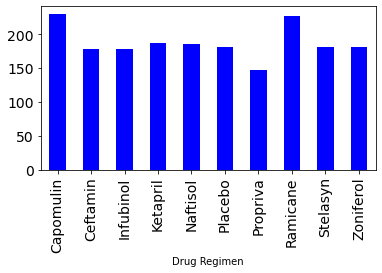

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_per_reg = m_stu_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_timepoints = mice_per_reg.plot.bar(figsize=(6,3), color='b',fontsize = 14)
mice_per_reg

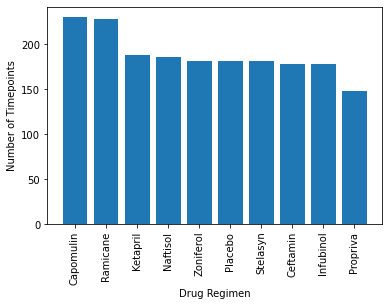

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_per_reg2 = mice_per_reg.sort_values(ascending=False) 
plt.bar(mice_per_reg2.index, mice_per_reg2.values)
plt.ylabel('Number of Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


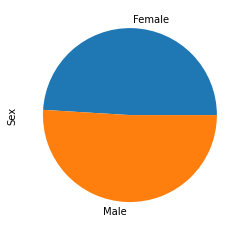

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = m_stu_clean_df.groupby(['Sex'])['Sex'].count()
mice_sex
sex_plot = mice_sex.plot.pie(subplots=True, figsize=(8, 4))

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex


Sex
Female    922
Male      958
Name: Sex, dtype: int64

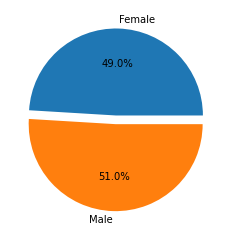

In [80]:
labels = 'Female', 'Male'
sizes = [922, 958]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = m_stu_clean_df.groupby(['Mouse ID'])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tumor_vol = pd.merge(m_stu_clean_df, greatest_tp_df, on=('Mouse ID', 'Timepoint'))
greatest_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [48]:
mice_per_reg

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = greatest_tumor_vol.loc[greatest_tumor_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"] 
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


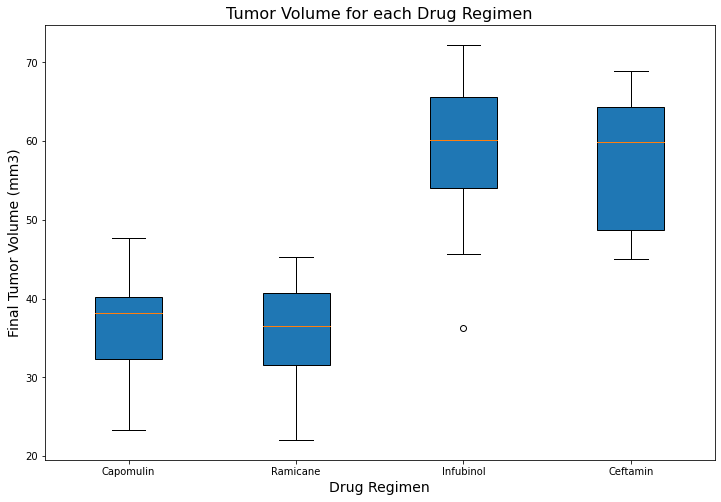

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.4, patch_artist=True, vert=True)

plt.show()

## Line and Scatter Plots

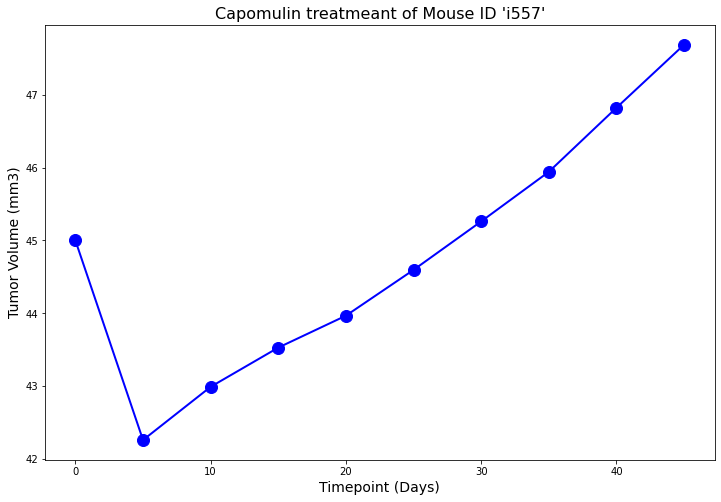

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = m_stu_clean_df.loc[m_stu_clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

# Get data for a specific mouse (Mouse ID i557)
mouse_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557",:]
mouse_in_capomulin

# Specify plot parameters
x_axis = mouse_in_capomulin["Timepoint"]
tumor_volume = mouse_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 'i557'",fontsize =16)
plt.plot(x_axis, tumor_volume, linewidth=2, markersize=12, marker="o", color="blue", label="mm3")
plt.xlabel("Timepoint (Days)", fontsize =14)
plt.ylabel("Tumor Volume (mm3)", fontsize =14)

plt.show()


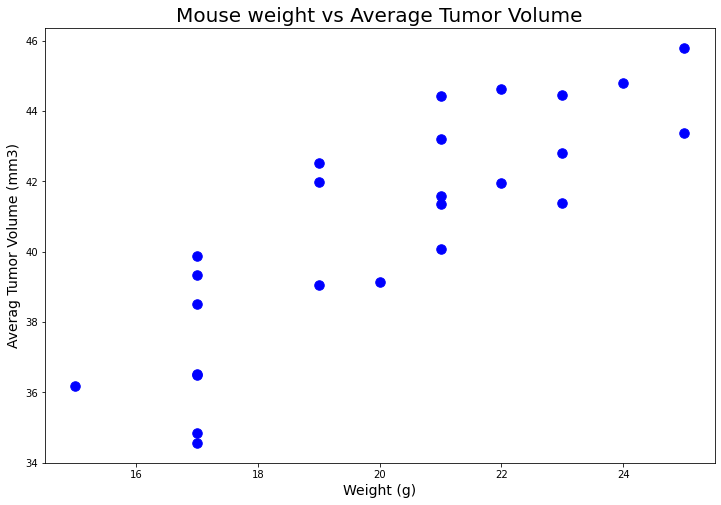

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capom_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'], s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume", fontsize =20)
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize=14)

plt.show()
avg_capom_df.head()

## Correlation and Regression

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [82]:
li_reg_model=st.linregress(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])
li_reg_model

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

y = 0.95x + 21.55


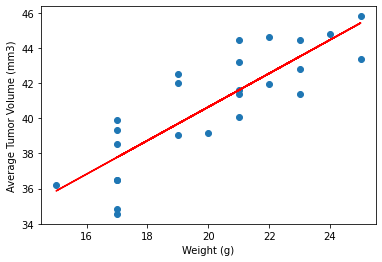

In [83]:
slope = 0.9544396890241048
intercept = 21.552160532685008
y_values = avg_capom_df['Weight (g)']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(avg_capom_df['Weight (g)'],avg_capom_df['Tumor Volume (mm3)'])
plt.plot(avg_capom_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# plt.savefig('linearregression')
plt.show()